In [125]:
using Plots

In [126]:
# Model domain
xmin = -1.0
xmax =  1.0
nvx  = 100                                 # number of vertices
ncx  = nvx - 1                             # number of cells
Δx   = (xmax - xmin) / ncx                 # size of one cell
xv   = LinRange(xmin, xmax, nvx)           # vertices coordinates
xc   = LinRange(xmin+Δx/2, xmax-Δx/2, ncx) # centroid coordinates

99-element LinRange{Float64, Int64}:
 -0.989899, -0.969697, -0.949495, -0.929293, …, 0.949495, 0.969697, 0.989899

### Function
1) Define a field $f$ of value 1 for all values of $x$ using vertices coordinates (`xv`)  
2) Calculate the derivative analytically ($\frac{\partial f}{\partial x}^\text{ana}$) and numerically ($\frac{\partial f}{\partial x}^\text{num}$) using centroids coordinates (`xc`)
3) Visualise

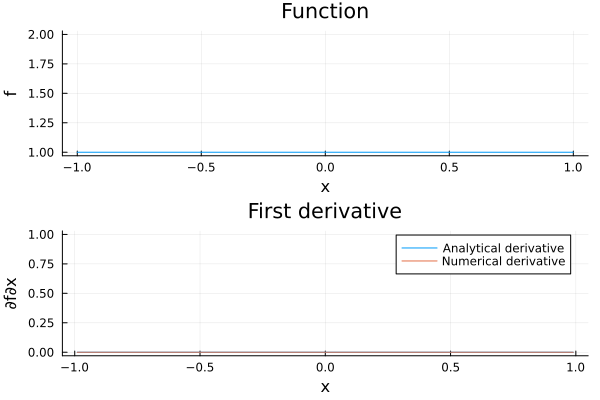

In [127]:
f        =  ones(nvx)
∂f∂x_ana = zeros(ncx)
∂f∂x_num = diff(f)/Δx

p1 = plot(xlabel="x", ylabel="f", title = "Function")
p1 = plot!(xv, f, label = :none)
p2 = plot(xlabel="x", ylabel="∂f∂x", title = "First derivative")
p2 = plot!(xc, ∂f∂x_ana, label = "Analytical derivative")
p2 = plot!(xc, ∂f∂x_num, label = "Numerical derivative")
plot(p1, p2, layout=(2,1))

### The power rule
1) Define a field $f(x) = x^3$ using vertices coordinates (`xv`)  
2) Calculate the derivative analytically ($\frac{\partial f}{\partial x}^\text{ana}$) and numerically ($\frac{\partial f}{\partial x}^\text{num}$) using centroids coordinates (`xc`)
3) Calculate the second derivative analytically ($\frac{\partial^2 f}{\partial x^2}^\text{ana}$) and numerically ($\frac{\partial^2 f}{\partial x^2}^\text{num}$) using inner vertices coordinates (`xv[2:end-1]`)
4) Visualise

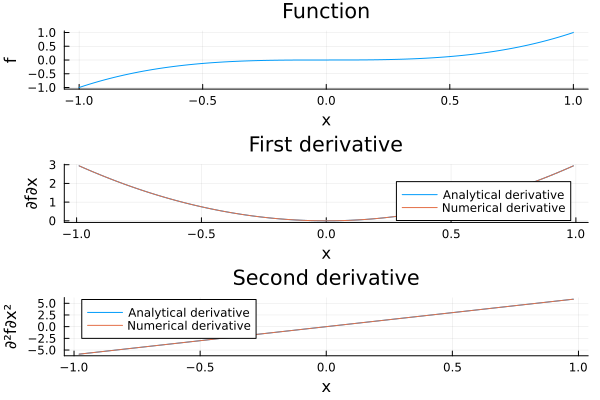

In [128]:
f          = xv.^3  
∂f∂x_ana   = 3 .* xc.^2
∂f2∂x2_ana = 6 .* xv[2:end-1]
∂f∂x_num   = diff(f)/Δx
∂f2∂x2_num = diff(∂f∂x_num)/Δx

p1 = plot(xlabel="x", ylabel="f", title = "Function")
p1 = plot!(xv, f, label = :none)
p2 = plot(xlabel="x", ylabel="∂f∂x", title = "First derivative")
p2 = plot!(xc, ∂f∂x_ana, label = "Analytical derivative")
p2 = plot!(xc, ∂f∂x_num, label = "Numerical derivative")
p3 = plot(xlabel="x", ylabel="∂²f∂x²", title = "Second derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_ana, label = "Analytical derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_num, label = "Numerical derivative")
plot(p1, p2, p3, layout=(3,1))

### The sum rule
1) Define a field $f(x) = g(x) + h(x)$ where $g(x) = x^3$ and $h(x) = x^2$ using vertices coordinates (`xv`)  
2) Calculate the derivative analytically ($\frac{\partial f}{\partial x}^\text{ana}$) and numerically ($\frac{\partial f}{\partial x}^\text{num}$) using centroids coordinates (`xc`)
3) Calculate the second derivative analytically ($\frac{\partial^2 f}{\partial x^2}^\text{ana}$) and numerically ($\frac{\partial^2 f}{\partial x^2}^\text{num}$)  using inner vertices coordinates (`xv[2:end-1]`)
4) Visualise

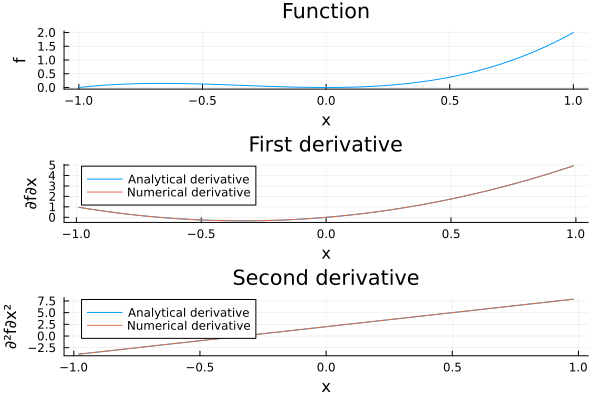

In [129]:
g          = xv.^3
h          = xv.^2
f          = g + h
∂f∂x_ana   = 3 .*xc.^2 + 2 .*xc
∂f2∂x2_ana = 6 .*xv[2:end-1] .+ 2 
∂f∂x_num   = diff(f)/Δx
∂f2∂x2_num = diff(∂f∂x_num)/Δx

p1 = plot(xlabel="x", ylabel="f", title = "Function")
p1 = plot!(xv, f, label = :none)
p2 = plot(xlabel="x", ylabel="∂f∂x", title = "First derivative")
p2 = plot!(xc, ∂f∂x_ana, label = "Analytical derivative")
p2 = plot!(xc, ∂f∂x_num, label = "Numerical derivative")
p3 = plot(xlabel="x", ylabel="∂²f∂x²", title = "Second derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_ana, label = "Analytical derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_num, label = "Numerical derivative")
plot(p1, p2, p3, layout=(3,1))

### The product rule
1) Define a field $f(x) = g(x) \times h(x)$ where $g(x) = x^3$ and $h(x) = x^2$ using vertices coordinates (`xv`)  
2) Calculate the derivative analytically ($\frac{\partial f}{\partial x}^\text{ana}$) and numerically ($\frac{\partial f}{\partial x}^\text{num}$) using centroids coordinates (`xc`)
3) Calculate the second derivative analytically ($\frac{\partial^2 f}{\partial x^2}^\text{ana}$) and numerically ($\frac{\partial^2 f}{\partial x^2}^\text{num}$)  using inner vertices coordinates (`xv[2:end-1]`)
4) Visualise

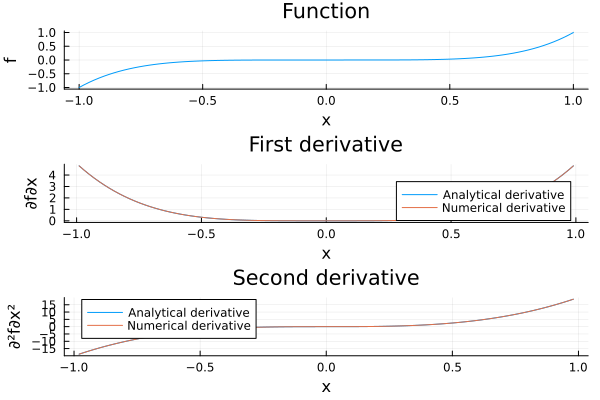

In [130]:
g          = xv.^3
h          = xv.^2
f          = g .* h
#  dfdx    = dgdx*h               + g*dhdx
# ∂f∂x_ana   =  (3.*xc.^2).*xc.^2  .+ xc.^3.*(2 .*xc)    
∂f∂x_ana   = 5 .* xc.^4                  
∂f2∂x2_ana = 20 .* xv[2:end-1].^3
∂f∂x_num   = diff(f)/Δx
∂f2∂x2_num = diff(∂f∂x_num)/Δx

p1 = plot(xlabel="x", ylabel="f", title = "Function")
p1 = plot!(xv, f, label = :none)
p2 = plot(xlabel="x", ylabel="∂f∂x", title = "First derivative")
p2 = plot!(xc, ∂f∂x_ana, label = "Analytical derivative")
p2 = plot!(xc, ∂f∂x_num, label = "Numerical derivative")
p3 = plot(xlabel="x", ylabel="∂²f∂x²", title = "Second derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_ana, label = "Analytical derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_num, label = "Numerical derivative")
plot(p1, p2, p3, layout=(3,1))

### The chain rule
1) Define a field $f(x) = \sin(x^2)$ using vertices coordinates (`xv`)  
2) Calculate the derivative analytically ($\frac{\partial f}{\partial x}^\text{ana}$) and numerically ($\frac{\partial f}{\partial x}^\text{num}$) using centroids coordinates (`xc`)
3) Calculate the second derivative analytically ($\frac{\partial^2 f}{\partial x^2}^\text{ana}$) and numerically ($\frac{\partial^2 f}{\partial x^2}^\text{num}$) using inner vertices coordinates (`xv[2:end-1]`)
4) Visualise

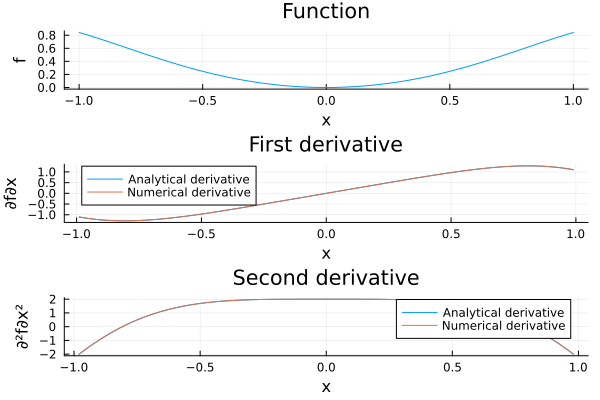

In [131]:
f          = sin.(xv.^2) # achtung: dot to broadcast sinus function to xv.^2
∂f∂x_ana   = 2 .* xc.*cos.(xc.^2)
# ∂f2∂x2_ana = 2 .* cos.(xv[2:end-1].^2) .+ 2 .*xv[2:end-1] .* (2.*xv[2:end-1] .* -sin(xv[2:end-1].^2) )
∂f2∂x2_ana = 2 .* cos.(xv[2:end-1].^2) .- 4 .*xv[2:end-1].^2 .* sin.(xv[2:end-1].^2)
∂f∂x_num   = diff(f)/Δx
∂f2∂x2_num = diff(∂f∂x_num)/Δx

p1 = plot(xlabel="x", ylabel="f", title = "Function")
p1 = plot!(xv, f, label = :none)
p2 = plot(xlabel="x", ylabel="∂f∂x", title = "First derivative")
p2 = plot!(xc, ∂f∂x_ana, label = "Analytical derivative")
p2 = plot!(xc, ∂f∂x_num, label = "Numerical derivative")
p3 = plot(xlabel="x", ylabel="∂²f∂x²", title = "Second derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_ana, label = "Analytical derivative")
p3 = plot!(xv[2:end-1], ∂f2∂x2_num, label = "Numerical derivative")
plot(p1, p2, p3, layout=(3,1))